**CLASIFICACION BINARIA**

In [157]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt



Carga y exploración de datos

In [158]:
# Carga los datos desde un archivo CSV
data = pd.read_csv('datasets/data_by_genres.csv')

# Visualiza las primeras filas del conjunto de datos
print(data.head())



           genres  acousticness  danceability   duration_ms    energy  \
0           432hz      0.494780      0.299333  1.048887e+06  0.450678   
1              []      0.679245      0.521473  2.298526e+05  0.401522   
2      a cappella      0.621532      0.577017  1.936522e+05  0.345694   
3        abstract      0.359395      0.459500  3.430185e+05  0.487000   
4  abstract beats      0.353347      0.694400  2.338244e+05  0.613400   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.477762  0.131000 -16.854000     0.076817  120.285667  0.221750   
1          0.196737  0.221586 -12.679076     0.112267  112.025168  0.515920   
2          0.003799  0.127087 -12.770211     0.095324  111.813230  0.453186   
3          0.791400  0.119480 -14.092000     0.043420  124.743200  0.304990   
4          0.349403  0.102453  -6.699800     0.143453  119.398400  0.634187   

   popularity  key  mode  
0   52.166667    5     1  
1   21.682005    7     1  
2   4

In [159]:
# Realiza análisis exploratorio de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            2664 non-null   object 
 1   acousticness      2664 non-null   float64
 2   danceability      2664 non-null   float64
 3   duration_ms       2664 non-null   float64
 4   energy            2664 non-null   float64
 5   instrumentalness  2664 non-null   float64
 6   liveness          2664 non-null   float64
 7   loudness          2664 non-null   float64
 8   speechiness       2664 non-null   float64
 9   tempo             2664 non-null   float64
 10  valence           2664 non-null   float64
 11  popularity        2664 non-null   float64
 12  key               2664 non-null   int64  
 13  mode              2664 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 291.5+ KB


Preprocesamiento de datos

Realiza cualquier preprocesamiento necesario, como la eliminación de valores nulos, la codificación de variables categóricas y la normalización de datos.

In [160]:
#convierte las variables categoricas a numericas
columnas_categoricas = data.select_dtypes(include=['object']).columns

In [161]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])


In [162]:
# Realiza análisis exploratorio de datos

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            2664 non-null   int32  
 1   acousticness      2664 non-null   float64
 2   danceability      2664 non-null   float64
 3   duration_ms       2664 non-null   float64
 4   energy            2664 non-null   float64
 5   instrumentalness  2664 non-null   float64
 6   liveness          2664 non-null   float64
 7   loudness          2664 non-null   float64
 8   speechiness       2664 non-null   float64
 9   tempo             2664 non-null   float64
 10  valence           2664 non-null   float64
 11  popularity        2664 non-null   float64
 12  key               2664 non-null   int64  
 13  mode              2664 non-null   int64  
dtypes: float64(11), int32(1), int64(2)
memory usage: 281.1 KB


In [163]:
# Elimina filas con valores nulos (si es necesario)
data = data.dropna()

# Divide el conjunto de datos en características (X) y variable objetivo (y)
X = data.iloc[:, :13]
y = data.iloc[:, 13]



División del conjunto de datos

Divide el conjunto de datos en conjuntos de entrenamiento y prueba.

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Conversion de datos de Numpy a tensores de Pytorch** para asegurar la compatibilidad con las operaciones y modelos de PyTorch, permitiendo el cálculo de gradientes durante el entrenamiento, lo que es esencial para el aprendizaje automático, y para aprovechar eficientemente la aceleración de hardware, como las GPUs, mientras se mantiene la flexibilidad de trabajar con datos en NumPy cuando sea necesario.

In [165]:
# Normaliza las características (opcional pero generalmente recomendado)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Definición del modelo de regresión

Definir el modelo de regresion logistica utilizando PyTorch.

In [166]:
class RegresionLogistica(nn.Module):
    def __init__(self, input_size):
        super(RegresionLogistica, self).__init__()
        self.fc = nn.Linear(input_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc(x)
        x = self.sigmoid(x)
        return x

input_size = X_train.shape[1]
model = RegresionLogistica(input_size)

Entrenamiento del modelo

Entrena del modelo con descenso por el gradiente

In [167]:
# Paso 6: Definir la función de pérdida y el optimizador
criterion = nn.BCELoss()  # Para clasificación binaria (entropía cruzada binaria) 
optimizer = optim.SGD(model.parameters(), lr=0.01) # (descenso de gradiente estocástico) con una tasa de aprendizaje de 0.01

num_epochs = 2000
train_losses = []

for epoch in range(num_epochs):
    inputs = torch.Tensor(X_train).float()
    targets = torch.Tensor(y_train.values).view(-1, 1).float()

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

Grafica de la convergencia del costo durante el entrenamiento, se registra la pérdida (loss) en cada época y luego se traza esta información.

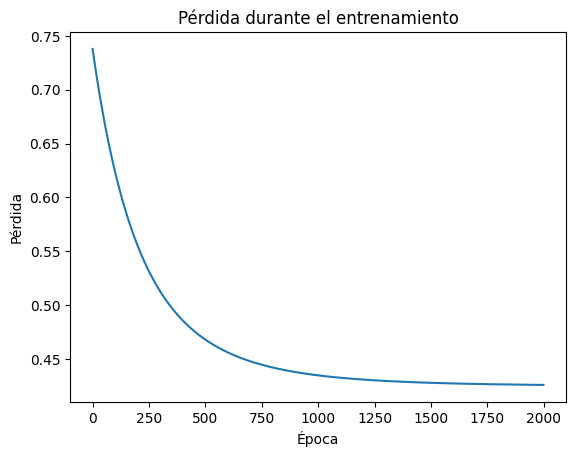

In [168]:
# Trazar la gráfica de la convergencia del costo
plt.plot(range(num_epochs), train_losses)
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el entrenamiento')
plt.show()


Evaluación del modelo

Evalúa el rendimiento del modelo en el conjunto de prueba.

In [169]:
# Cambiar al modo de evaluación
model.eval()
with torch.no_grad():
    test_inputs = torch.Tensor(X_test).float()
    predictions = model(test_inputs)
    predicted_classes = (predictions > 0.8).float()
    accuracy = accuracy_score(y_test, predicted_classes)
    conf_matrix = confusion_matrix(y_test, predicted_classes)
    class_report = classification_report(y_test, predicted_classes)

print(f'Exactitud: {accuracy:.4f}')
print('Matriz de Confusión:')
print(conf_matrix)
print('Reporte de Clasificación:')
print(class_report)

Exactitud: 0.7411
Matriz de Confusión:
[[ 29  55]
 [ 83 366]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.26      0.35      0.30        84
           1       0.87      0.82      0.84       449

    accuracy                           0.74       533
   macro avg       0.56      0.58      0.57       533
weighted avg       0.77      0.74      0.76       533



Calcular el porcentaje de error utilizando un ejemplo de predicción real a partir de tus datos de prueba

In [180]:
# Supongamos que quieres calcular el error para el primer ejemplo de prueba

# Tomar el indice del ejemplo que escojamos y este dentro de Test
indice_ejemplo = 97

ejemplo_prueba = X_test[indice_ejemplo]
ejemplo_ptensor = torch.Tensor(ejemplo_prueba).float()

# Realizar la predicción con el modelo
with torch.no_grad():
    prediccion = model(ejemplo_ptensor)
    clase_predicha = 1 if prediccion > 0.5 else 0  # Clasificación binaria

# Obtener el valor real para el primer ejemplo de prueba
valor_real = y_test.iloc[indice_ejemplo]

# Calcular el porcentaje de error
porcentaje_error = abs(clase_predicha - valor_real) * 100

print(f'Clase Predicha: {clase_predicha}')
print(f'Valor Real: {valor_real}')
print(f'Porcentaje de Error: {porcentaje_error:.2f}%')



Clase Predicha: 1
Valor Real: 1
Porcentaje de Error: 0.00%
